# RF

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 8 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 8]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_8,sin_time,cos_time
14,7.171949,17.262824,17.650673,15.885822,2121.130895,83500000000,32.370061,34.663677,30.308719,0.000000,...,26968.35883,27957.497475,25616.013501,62.960858,1.588138,2.496841,1.536522,1,1.224647e-16,-1.000000e+00
20,7.181019,17.583486,19.298023,16.822755,2113.551707,83500000000,0.000000,0.000000,0.000000,0.000000,...,39597.93354,40566.225157,38465.319003,99.264971,0.874096,1.614558,0.860217,1,1.224647e-16,-1.000000e+00
87,5.136881,17.921942,19.598982,16.462489,2118.859344,73500000000,0.000000,0.000000,0.000000,0.000000,...,37085.29954,37256.455073,34348.245927,89.123599,0.154461,0.184112,0.145983,1,0.000000e+00,1.000000e+00
180,7.245108,17.030897,17.421117,15.850073,2115.888623,83500000000,0.000000,0.000000,0.000000,0.000000,...,36598.46480,36671.764605,34678.512513,103.263943,1.261188,1.623821,1.150654,1,-1.000000e+00,-1.836970e-16
181,4.743570,17.269364,17.970022,17.031733,2117.504373,73500000000,13.912339,14.426880,13.417510,0.000000,...,25940.86379,28452.583547,24055.994734,100.478040,1.341056,1.797792,1.274658,1,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82532,12.366070,4.457111,4.845222,4.293367,4822.933611,83500000000,7.133573,7.398327,6.997204,0.003929,...,52520.24563,54258.242593,50738.624029,59.911834,1.667727,2.472327,1.649817,1,2.588190e-01,9.659258e-01
82533,12.292626,4.496445,4.559748,4.074900,4822.217167,73500000000,0.000000,0.000000,0.000000,0.000000,...,46382.33318,49745.513223,45330.572511,86.947371,0.883154,2.415317,0.799437,1,2.588190e-01,9.659258e-01
82534,12.848060,4.496179,4.871242,4.385426,4824.070455,83500000000,7.931666,8.203054,7.857899,0.055205,...,53280.21500,56264.323810,49759.611359,105.229774,1.209350,2.920373,1.187349,1,2.588190e-01,9.659258e-01
82535,12.714629,4.572546,4.926224,4.242475,4820.074906,73500000000,8.071216,8.423944,7.835229,0.015140,...,60026.79759,60284.717145,57999.730542,54.783968,1.514047,2.564783,1.390613,1,2.588190e-01,9.659258e-01


In [41]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [42]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017744251390>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017744167890>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017744164A50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001773FF4EF90>},
                   random_state=42, verbose=1)

In [43]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.878899494101819


In [44]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
6                sin_time  1.042103  0.889859                   19
5          TemperatureMin  1.044494  0.889353                   20
10       RelativeHumidity  1.045986  0.889037                   15
7            WindSpeedMin  1.046701  0.888885                   18
9          TemperatureMax  1.049684  0.888251                   16
8             Temperature  1.050489  0.888079                   17
11              Frequency  1.054984  0.887120                   14
2                cos_time  1.055365  0.887038                   23
4            WindSpeedMax  1.055620  0.886984                   21
1           WindDirection  1.057643  0.886550                   24
3               WindSpeed  1.058584  0.886348                   22
0             SYNOPCode_8  1.062310  0.885547                   25
12               Distance  1.179923  0.858800                   13
13  TemperatureDifference  1.203909  0.853001                 

In [45]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
6,sin_time,1.042103,0.889859,19
5,TemperatureMin,1.044494,0.889353,20
10,RelativeHumidity,1.045986,0.889037,15
7,WindSpeedMin,1.046701,0.888885,18
9,TemperatureMax,1.049684,0.888251,16
8,Temperature,1.050489,0.888079,17
11,Frequency,1.054984,0.887120,14
2,cos_time,1.055365,0.887038,23
4,WindSpeedMax,1.055620,0.886984,21
1,WindDirection,1.057643,0.886550,24


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\2577233247.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


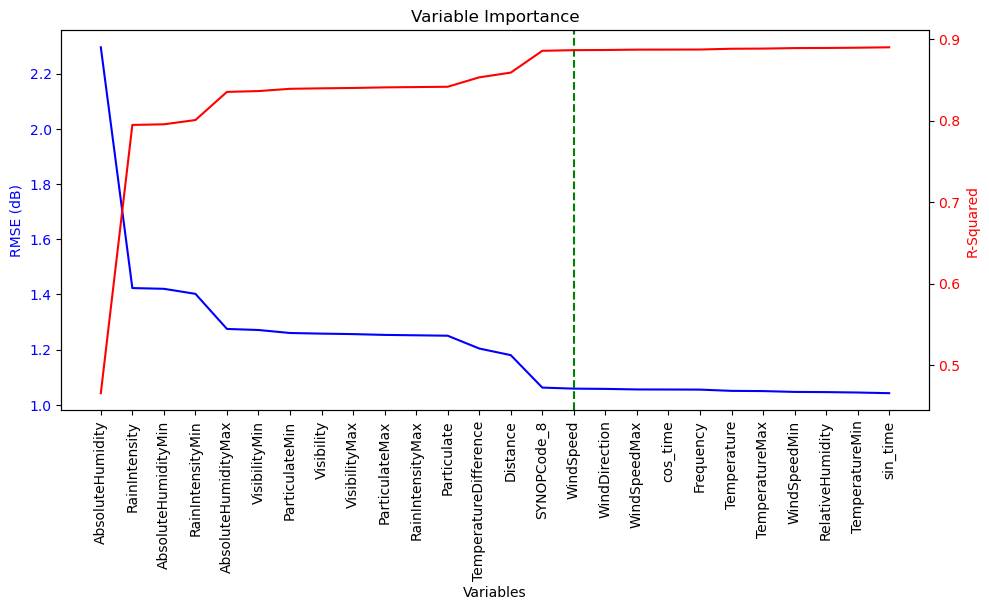

In [46]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 15
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [81]:
selected_features_RFL= [
    'SYNOPCode_8',
    'Distance',
    'RelativeHumidity',
    'TemperatureDifference',
    'VisibilityMin',
    'AbsoluteHumidityMin',
    'Visibility',
    'Particulate',
    'ParticulateMin',
    'RainIntensityMax',
    'VisibilityMax',
    'ParticulateMax',
    'RainIntensityMin',
    'AbsoluteHumidityMax',
    'RainIntensity',
    'AbsoluteHumidity'
]

In [82]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 1.0943286457745622
Test R^2: 0.8598336536881402


In [ ]:
Test RMSE: 1.0702468223605819
Test R^2: 0.8659347842246805

# FSO

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 8 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 8]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_8,sin_time,cos_time
14,9.649171,17.262824,17.650673,15.885822,2121.130895,83500000000,32.370061,34.663677,30.308719,0.000000,...,26968.35883,27957.497475,25616.013501,62.960858,1.588138,2.496841,1.536522,1,1.224647e-16,-1.000000e+00
20,8.171941,17.583486,19.298023,16.822755,2113.551707,83500000000,0.000000,0.000000,0.000000,0.000000,...,39597.93354,40566.225157,38465.319003,99.264971,0.874096,1.614558,0.860217,1,1.224647e-16,-1.000000e+00
87,7.535523,17.921942,19.598982,16.462489,2118.859344,73500000000,0.000000,0.000000,0.000000,0.000000,...,37085.29954,37256.455073,34348.245927,89.123599,0.154461,0.184112,0.145983,1,0.000000e+00,1.000000e+00
180,7.707559,17.030897,17.421117,15.850073,2115.888623,83500000000,0.000000,0.000000,0.000000,0.000000,...,36598.46480,36671.764605,34678.512513,103.263943,1.261188,1.623821,1.150654,1,-1.000000e+00,-1.836970e-16
181,8.356710,17.269364,17.970022,17.031733,2117.504373,73500000000,13.912339,14.426880,13.417510,0.000000,...,25940.86379,28452.583547,24055.994734,100.478040,1.341056,1.797792,1.274658,1,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82532,7.754264,4.457111,4.845222,4.293367,4822.933611,83500000000,7.133573,7.398327,6.997204,0.003929,...,52520.24563,54258.242593,50738.624029,59.911834,1.667727,2.472327,1.649817,1,2.588190e-01,9.659258e-01
82533,7.873959,4.496445,4.559748,4.074900,4822.217167,73500000000,0.000000,0.000000,0.000000,0.000000,...,46382.33318,49745.513223,45330.572511,86.947371,0.883154,2.415317,0.799437,1,2.588190e-01,9.659258e-01
82534,7.809871,4.496179,4.871242,4.385426,4824.070455,83500000000,7.931666,8.203054,7.857899,0.055205,...,53280.21500,56264.323810,49759.611359,105.229774,1.209350,2.920373,1.187349,1,2.588190e-01,9.659258e-01
82535,7.864476,4.572546,4.926224,4.242475,4820.074906,73500000000,8.071216,8.423944,7.835229,0.015140,...,60026.79759,60284.717145,57999.730542,54.783968,1.514047,2.564783,1.390613,1,2.588190e-01,9.659258e-01


In [12]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [13]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017743227FD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017743298310>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017743298E50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000017740463AD0>},
                   random_state=42, verbose=1)

In [14]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9076828426437968


In [15]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
9                cos_time  1.135588  0.922246                   16
16               sin_time  1.140320  0.921597                    9
8     AbsoluteHumidityMin  1.141013  0.921501                   17
10           WindSpeedMax  1.142025  0.921362                   15
7               WindSpeed  1.142681  0.921272                   18
12  TemperatureDifference  1.143713  0.921129                   13
14         ParticulateMax  1.147799  0.920565                   11
15    AbsoluteHumidityMax  1.149192  0.920372                   10
6           RainIntensity  1.149208  0.920370                   19
11         TemperatureMax  1.149820  0.920285                   14
5        RainIntensityMax  1.150315  0.920216                   20
4            WindSpeedMin  1.151022  0.920118                   21
2        RainIntensityMin  1.154021  0.919701                   23
3           WindDirection  1.155903  0.919439                 

In [16]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
9,cos_time,1.135588,0.922246,16
16,sin_time,1.140320,0.921597,9
8,AbsoluteHumidityMin,1.141013,0.921501,17
10,WindSpeedMax,1.142025,0.921362,15
7,WindSpeed,1.142681,0.921272,18
12,TemperatureDifference,1.143713,0.921129,13
14,ParticulateMax,1.147799,0.920565,11
15,AbsoluteHumidityMax,1.149192,0.920372,10
6,RainIntensity,1.149208,0.920370,19
11,TemperatureMax,1.149820,0.920285,14


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\1670938031.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


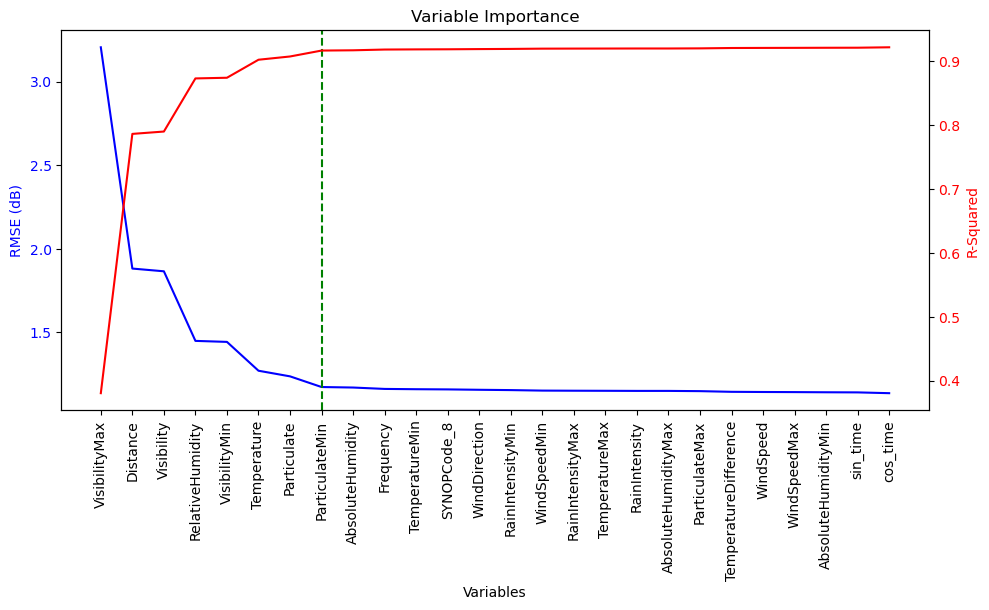

In [17]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 7
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [18]:
selected_features_FSO = [
    'ParticulateMin',
    'AbsoluteHumidity',
    'Temperature',
    'RelativeHumidity',
    'Distance',
    'VisibilityMax',
    'VisibilityMin',
    'Visibility'
]


In [19]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 1.0853984558111258
Test R^2: 0.915396234840864


In [ ]:
1.0853984558111258
Test R^2: 0.915396234840864

# Plot

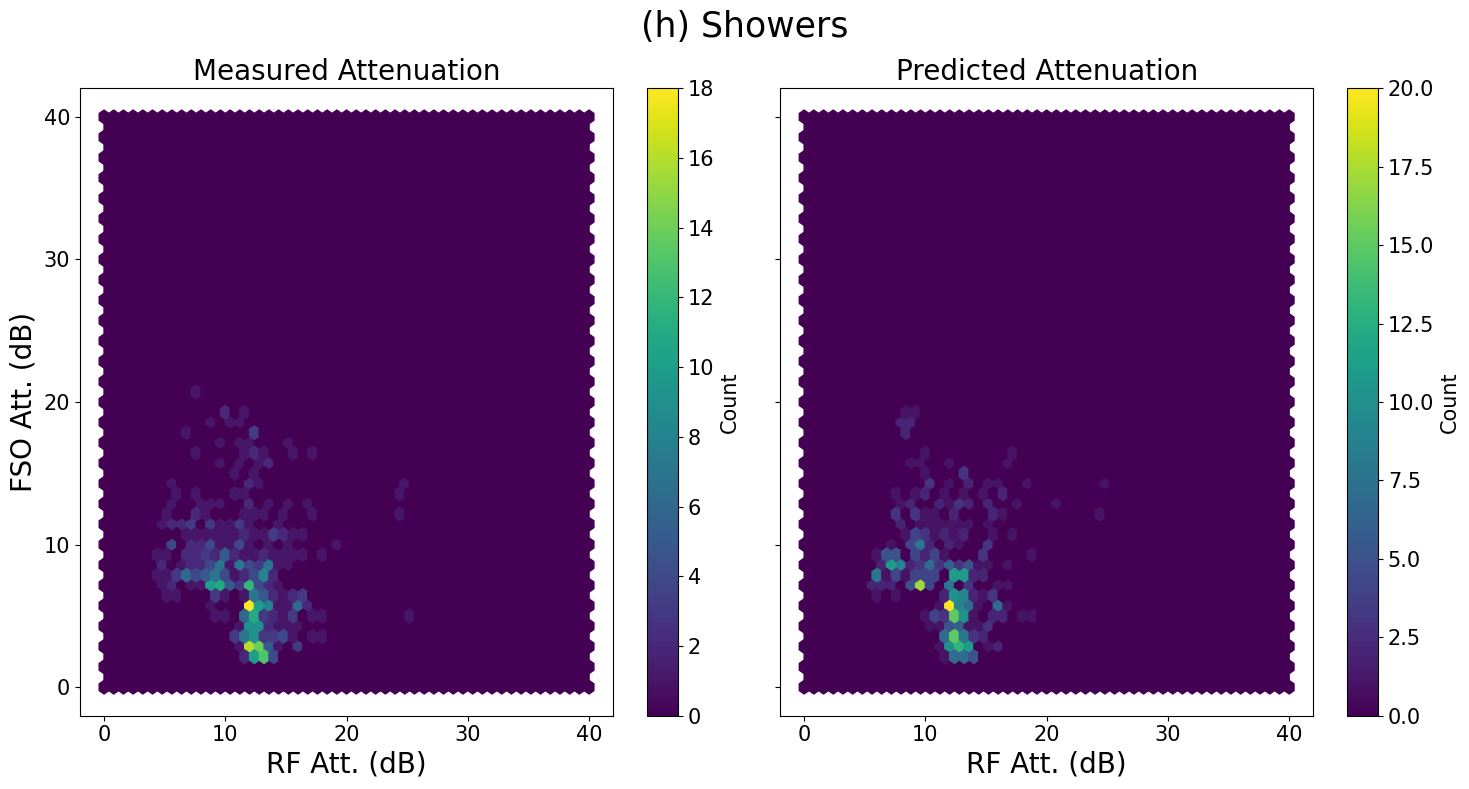

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(h) Showers',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\3901966315.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\3901966315.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


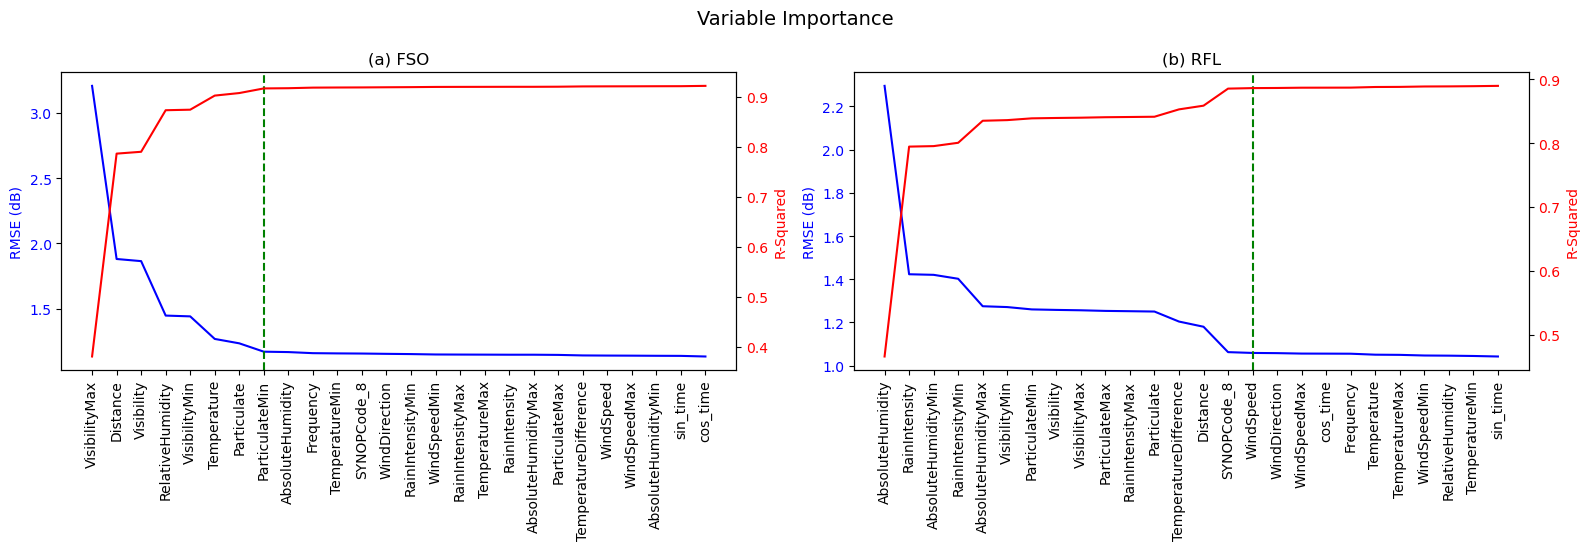

In [22]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6))  # Creating subplots side by side with swapped positions

# Plot for RFL
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')

ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax1.set_title('(b) RFL')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 15  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax1.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Plot for FSO
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax2.set_title('(a) FSO')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 7  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax2.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\265547975.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\265547975.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


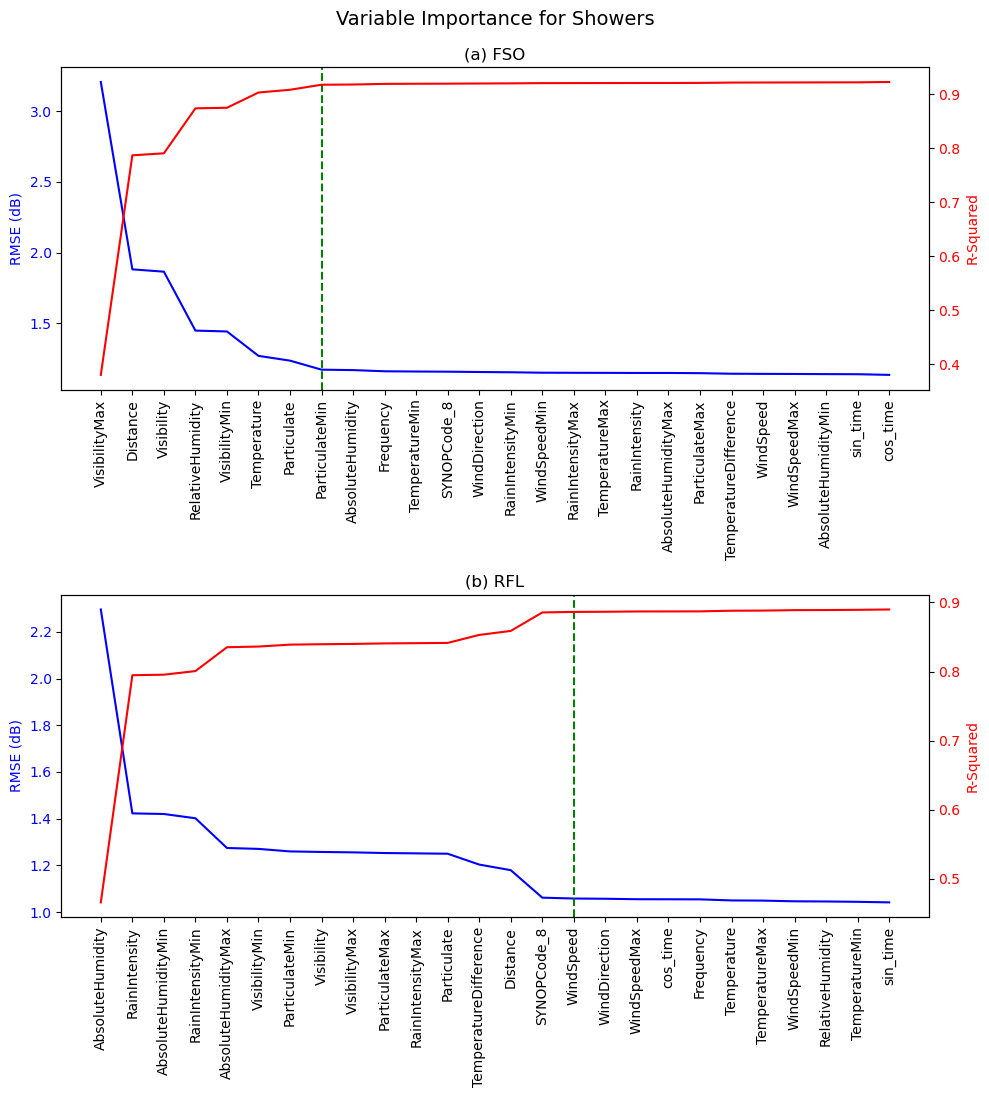

In [23]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 7  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 15  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Showers', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()


# Method 2 (RFL)

## train

In [24]:
# Continue from where you've trained the final model on RFL data
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

# Generate Predicted RFL Attenuation on the training data
predicted_FSO_train_2 = final_model_FSO.predict(X_train_selected_FSO)
X_train_RFL['Predicted_FSO_Att_2'] = predicted_FSO_train_2  # Enhance the FSO training dataset

# Use final_model_FSO to predict FSO attenuation on the test data
predicted_FSO_test_2 = final_model_FSO.predict(X_test_selected_FSO)
X_test_RFL['Predicted_FSO_Att_2'] = predicted_FSO_test_2


# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_RFL_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_RFL_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_RFL_2 = RandomizedSearchCV(
    estimator=rf_RFL_2,
    param_distributions=param_distributions_RFL_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for FSO
random_search_RFL_2.fit(X_train_RFL, y_train_RFL)  

# Retrieve and apply the best hyperparameters
best_params_RFL_2 = random_search_RFL_2.best_params_
best_score_RFL_2 = random_search_RFL_2.best_score_
print(f"Best hyperparameters for RFL: {best_params_RFL_2}")
print(f"Best OOB score from RandomizedSearchCV for RFL: {best_score_RFL_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for RFL: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for RFL: 0.8801788098006622


In [25]:
X_train_RFL

,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,RainIntensityMax,...,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_8,sin_time,cos_time,Predicted_FSO_Att_2
14455,17.486088,17.930269,17.392864,2960.764471,73500000000,84.450997,86.448711,83.109990,0.099916,0.109896,...,9987.436512,8806.410719,43.215234,0.263624,0.625069,0.253676,1,-0.965926,-0.258819,10.134507
17216,20.341179,20.806251,20.101751,2958.124532,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,43403.781938,40723.381495,91.403007,0.473687,1.517019,0.454329,1,0.258819,0.965926,6.695281
58920,5.934532,6.498898,5.568410,4824.857476,83500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39129.631028,32969.451707,28.353713,0.836743,1.930339,0.832978,1,-0.500000,0.866025,4.748475
60079,4.584888,4.813093,4.278423,4825.240836,73500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7418.634620,6671.582857,54.316692,1.441002,3.254842,1.380389,1,0.000000,1.000000,9.710520
44381,6.463931,6.581471,6.308738,2012.599011,73500000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53893.146725,45048.827655,66.440690,3.289086,6.284859,3.211964,1,-0.500000,-0.866025,2.581572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50999,11.384310,11.686584,11.054054,2018.153150,73500000000,174.912616,188.515642,172.608997,0.000000,0.000000,...,8428.066276,7303.756801,106.176817,0.092167,0.170267,0.083516,1,0.000000,1.000000,5.833351
56883,5.938114,6.182977,5.461478,4819.435242,73500000000,5.954184,5.964829,5.790368,0.003016,0.003118,...,77990.816742,72244.986530,98.457790,0.039269,0.174291,0.037609,1,-0.707107,-0.707107,4.484592
32923,9.440010,9.769202,8.982054,2013.743419,73500000000,9.903584,10.819517,9.667101,0.000000,0.000000,...,49699.491035,44375.560208,49.618614,1.531556,3.006267,1.480695,1,-0.707107,-0.707107,2.416449
68139,5.188786,5.678326,4.889808,4818.953935,73500000000,7.037990,7.519439,6.453053,0.007857,0.008348,...,82317.581663,70922.556803,81.750221,2.776037,5.684866,2.725471,1,0.258819,-0.965926,5.102478


# Feature selection

In [26]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL_2 = pd.DataFrame(X_train_RFL, columns=X_train_RFL.columns)
train_df_RFL_2['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL_2= rank_variables_oob(train_df_RFL_2, 'RFL_Att', best_params_RFL_2)
print(rankings_table_RFL_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
6                sin_time  1.041427  0.890002                   20
5          TemperatureMin  1.045532  0.889133                   21
9     Predicted_FSO_Att_2  1.045892  0.889057                   17
11       RelativeHumidity  1.045986  0.889037                   15
8             Temperature  1.047937  0.888623                   18
7               WindSpeed  1.048025  0.888604                   19
10         TemperatureMax  1.049684  0.888251                   16
2                cos_time  1.051661  0.887830                   24
3            WindSpeedMin  1.054400  0.887244                   23
12              Frequency  1.054984  0.887120                   14
4            WindSpeedMax  1.055237  0.887066                   22
0             SYNOPCode_8  1.059097  0.886238                   26
1           WindDirection  1.060629  0.885908                   25
13               Distance  1.179923  0.858800                 

In [27]:
rankings_table_RFL_2

,Removed Variable,RSMSE,R^2,Remaining Variables
6,sin_time,1.041427,0.890002,20
5,TemperatureMin,1.045532,0.889133,21
9,Predicted_FSO_Att_2,1.045892,0.889057,17
11,RelativeHumidity,1.045986,0.889037,15
8,Temperature,1.047937,0.888623,18
7,WindSpeed,1.048025,0.888604,19
10,TemperatureMax,1.049684,0.888251,16
2,cos_time,1.051661,0.887830,24
3,WindSpeedMin,1.054400,0.887244,23
12,Frequency,1.054984,0.887120,14


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\276398269.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


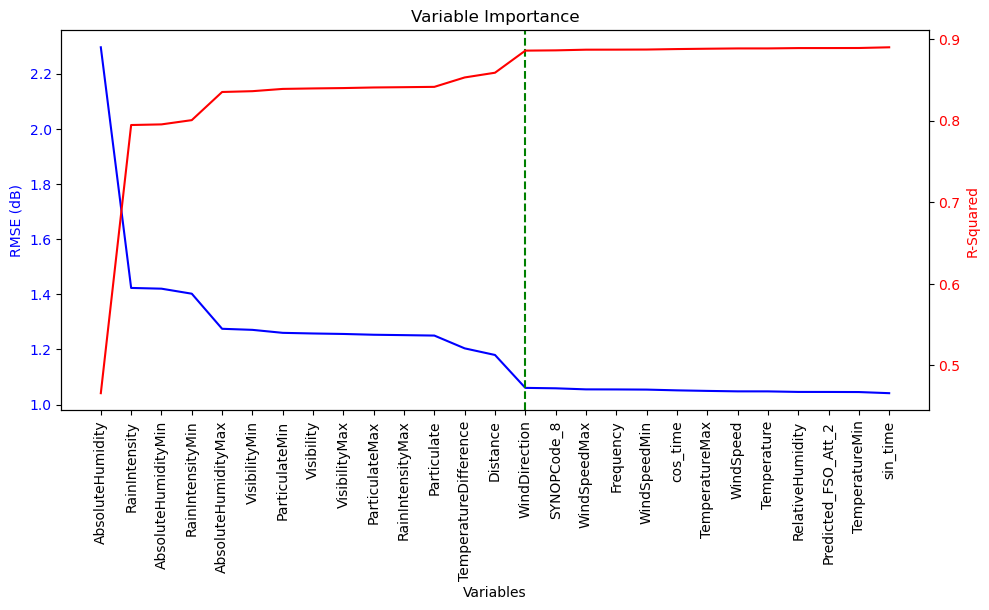

In [28]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL_2 = rankings_table_RFL_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 14
cutoff_variable = rankings_table_sorted_RFL_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [29]:
selected_features_RFL_2= [
    
    'WindDirection',
    'Distance',
    'TemperatureDifference',
    'Particulate',
    'RainIntensityMax',
    'ParticulateMax',
    'VisibilityMax',
    'Visibility',
    'ParticulateMin',
    'VisibilityMin',
    'AbsoluteHumidityMax',
    'RainIntensityMin',
    'AbsoluteHumidityMin',
    'RainIntensity',
    'AbsoluteHumidity'
]
# Select only the chosen features for training and testing
X_train_selected_RFL_2 = X_train_RFL[selected_features_RFL_2]
X_test_selected_RFL_2 = X_test_RFL[selected_features_RFL_2]


In [30]:
final_model_RFL_2 = RandomForestRegressor(
    n_estimators=best_params_RFL_2['n_estimators'],
    max_depth=best_params_RFL_2['max_depth'],
    min_samples_split=best_params_RFL_2['min_samples_split'],
    min_samples_leaf=best_params_RFL_2['min_samples_leaf'],
    bootstrap=best_params_RFL_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_RFL_2.fit(X_train_selected_RFL_2, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [31]:

# Now, predict RFL on the enhanced test data
predicted_RFL_test_2 = final_model_RFL_2.predict(X_test_selected_RFL_2)

# Calculate RMSE and R^2 for the test data to evaluate the RFL model
test_rmse_RFL_2 = mean_squared_error(y_test_RFL, predicted_RFL_test_2, squared=False)
test_r2_RFL_2 = r2_score(y_test_RFL, predicted_RFL_test_2)

print(f"Test RMSE for RFL: {test_rmse_RFL_2}")
print(f"Test R^2 for RFL: {test_r2_RFL_2}")


Test RMSE for RFL: 1.099773305096288
Test R^2 for RFL: 0.858435432974381


# Method 3 (FSO)

## Train

In [32]:
# Continue from where you've trained the final model on RFL data
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

# Generate Predicted RFL Attenuation on the training data
predicted_RFL_train_2 = final_model_RFL.predict(X_train_selected_RFL)
X_train_FSO['Predicted_RFL_Att_2'] = predicted_RFL_train_2  
# Use final_model_RFL to predict RFL attenuation on the test data
predicted_RFL_test_2 = final_model_RFL.predict(X_test_selected_RFL)
# Enhance the FSO test dataset with these predictions
X_test_FSO['Predicted_RFL_Att_2'] = predicted_RFL_test_2

# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_FSO_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_FSO_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_FSO_2 = RandomizedSearchCV(
    estimator=rf_FSO_2,
    param_distributions=param_distributions_FSO_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for RFL
random_search_FSO_2.fit(X_train_FSO, y_train_FSO)  # Note: Using X_train_RFL not X_train_FSO

# Retrieve and apply the best hyperparameters
best_params_FSO_2 = random_search_FSO_2.best_params_
best_score_FSO_2 = random_search_FSO_2.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO_2}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9056594838856927


## Feature selection

In [33]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO_2 = pd.DataFrame(X_train_FSO, columns=X_train_FSO.columns)
train_df_FSO_2['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO_2 = rank_variables_oob(train_df_FSO_2, 'FSO_Att', best_params_FSO_2)
print(rankings_table_FSO_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
10           WindSpeedMax  1.141347  0.921455                   16
9          TemperatureMax  1.144962  0.920957                   17
11               cos_time  1.144988  0.920954                   15
7           RainIntensity  1.148939  0.920407                   19
8               WindSpeed  1.150532  0.920186                   18
12         ParticulateMax  1.154075  0.919694                   14
13  TemperatureDifference  1.154579  0.919624                   13
6     AbsoluteHumidityMin  1.155055  0.919557                   20
5            WindSpeedMin  1.157224  0.919255                   21
4        RainIntensityMin  1.158161  0.919124                   22
16               sin_time  1.159204  0.918978                   10
0             SYNOPCode_8  1.161571  0.918647                   26
1               Frequency  1.165428  0.918106                   25
3           WindDirection  1.166642  0.917935                 

In [34]:
rankings_table_FSO_2

,Removed Variable,RSMSE,R^2,Remaining Variables
10,WindSpeedMax,1.141347,0.921455,16
9,TemperatureMax,1.144962,0.920957,17
11,cos_time,1.144988,0.920954,15
7,RainIntensity,1.148939,0.920407,19
8,WindSpeed,1.150532,0.920186,18
12,ParticulateMax,1.154075,0.919694,14
13,TemperatureDifference,1.154579,0.919624,13
6,AbsoluteHumidityMin,1.155055,0.919557,20
5,WindSpeedMin,1.157224,0.919255,21
4,RainIntensityMin,1.158161,0.919124,22


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\1950652380.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)


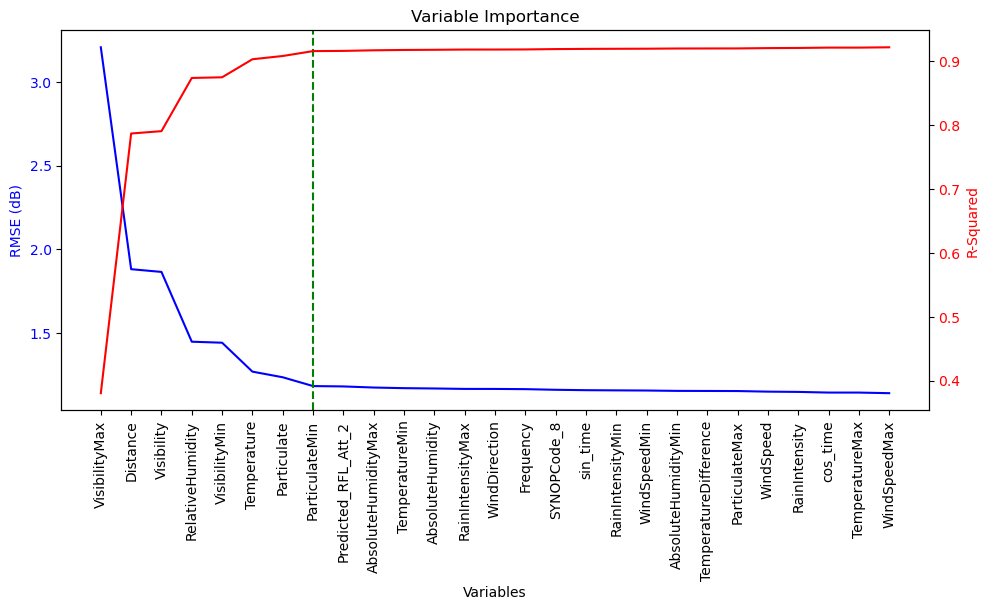

In [35]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO_2 = rankings_table_FSO_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 7
cutoff_variable = rankings_table_sorted_FSO_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [36]:
selected_features_FSO_2 = [
    'ParticulateMin',
    'Particulate',
    'Temperature',
    'VisibilityMin',
    'RelativeHumidity',
    'Visibility',
    'Distance',
    'VisibilityMax'
    
]
# Select only the chosen features for training and testing
X_train_selected_FSO_2 = X_train_FSO[selected_features_FSO_2]
X_test_selected_FSO_2 = X_test_FSO[selected_features_FSO_2]


## Best parameter

In [37]:
final_model_FSO_2 = RandomForestRegressor(
    n_estimators=best_params_FSO_2['n_estimators'],
    max_depth=best_params_FSO_2['max_depth'],
    min_samples_split=best_params_FSO_2['min_samples_split'],
    min_samples_leaf=best_params_FSO_2['min_samples_leaf'],
    bootstrap=best_params_FSO_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_FSO_2.fit(X_train_selected_FSO_2, y_train_FSO)


RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [38]:
# Use RF2 to predict FSO attenuation on the enhanced test data
predicted_FSO_2 = final_model_FSO_2.predict(X_test_selected_FSO_2)

# Calculate RMSE and R-squared on the FSO test data to evaluate RF2
test_rmse_FSO_2 = mean_squared_error(y_test_FSO, predicted_FSO_2, squared=False)
test_r2_FSO_2 = r2_score(y_test_FSO, predicted_FSO_2)

print(f"Test RMSE for FSO: {test_rmse_FSO_2}")
print(f"Test R^2 for FSO: {test_r2_FSO_2}")


Test RMSE for FSO: 1.1706881519059333
Test R^2 for FSO: 0.9015776481705627


In [ ]:
# prompt: Create a function for crosstab frequency table for y_test_FSO and y_test_RFL that can specify bin size ie. bin_size = 1 mean to get frequency from 0 <= y < 1,  1 <= y < 2, .... until this range cover the max value of both y_test_FSO  and y_test_RFL

import pandas as pd
import numpy as np
def crosstab_frequency_table(y_test_FSO, y_test_RFL, bin_size):
  """
  Creates a crosstab frequency table for y_test_FSO and y_test_RFL with specified bin size.

  Args:
      y_test_FSO: Pandas Series containing the FSO attenuation values.
      y_test_RFL: Pandas Series containing the RFL attenuation values.
      bin_size: Integer specifying the size of the bins.

  Returns:
      Pandas DataFrame representing the crosstab frequency table.
  """

  # Determine the maximum value of both y_test_FSO and y_test_RFL
  max_value = max(y_test_FSO.max(), y_test_RFL.max())

  # Create bins based on the bin size
  bins = np.arange(0, max_value + bin_size, bin_size)


  # Digitize the data into bins, setting right=False to make bins [low, high)
  y_test_FSO_bins = pd.cut(y_test_FSO, bins=bins, right=False, include_lowest=True)
  y_test_RFL_bins = pd.cut(y_test_RFL, bins=bins, right=False, include_lowest=True)

  # Create the crosstab frequency table
  crosstab = pd.crosstab(y_test_FSO_bins, y_test_RFL_bins)

  return crosstab

import pandas as pd
import numpy as np

def mutual_information(crosstab):
    """
    Calculate and normalize the mutual information from a crosstab frequency table.

    Args:
        crosstab: Pandas DataFrame representing the crosstab frequency table.

    Returns:
        float representing the normalized mutual information.
    """
    total = crosstab.to_numpy().sum()
    P_xy = crosstab / total  # Joint probability distribution
    P_x = P_xy.sum(axis=1)   # Marginal probability distribution of X
    P_y = P_xy.sum(axis=0)   # Marginal probability distribution of Y

    # Calculate entropies
    H_x = -np.sum(P_x * np.log(P_x + 1e-15))  # add a small number to avoid log(0)
    H_y = -np.sum(P_y * np.log(P_y + 1e-15))
    H_xy = -np.sum(P_xy.values * np.log(P_xy.values + 1e-15))

    I_xy = H_x + H_y - H_xy  # Mutual information

    # Normalizing mutual information between 0 and 1
    min_H = min(H_x, H_y)
    if min_H > 0:
        normalized_I_xy = I_xy / min_H
    else:
        normalized_I_xy = 0

    return normalized_I_xy

In [59]:
print("Pearson correlation between y_test_FSO and y_test_RFL:")
print(np.corrcoef(y_test_FSO, y_test_RFL)[0, 1])
#Assuming y_test_FSO and y_test_RFL are defined and filled with data
crosstab = crosstab_frequency_table(y_test_FSO, y_test_RFL, bin_size=0.3)
mi = mutual_information(crosstab)
print("Normalized Mutual Information:", mi)
print(crosstab.max().max())

Pearson correlation between y_test_FSO and y_test_RFL:
-0.235658545223996
Normalized Mutual Information: 0.40304408180363077
9


In [80]:


print("Pearson correlation between y_test_FSO and y_test_RFL:")
print(np.corrcoef(predicted_FSO_2, predicted_RFL_test_2)[0, 1])
#Assuming y_test_FSO and y_test_RFL are defined and filled with data
crosstab = crosstab_frequency_table(predicted_FSO_2, predicted_RFL_test_2, bin_size=0.35)
mi = mutual_information(crosstab)
print("Normalized Mutual Information:", mi)
print(crosstab.max().max())

Pearson correlation between y_test_FSO and y_test_RFL:
-0.20798076838315602
Normalized Mutual Information: 0.39175002338959786
9


In [79]:

print("Pearson correlation between y_test_FSO and y_test_RFL:")
print(np.corrcoef(predictions_FSO, predictions_RFL)[0, 1])
#Assuming y_test_FSO and y_test_RFL are defined and filled with data
crosstab = crosstab_frequency_table(predictions_FSO, predictions_RFL, bin_size=0.35)
mi = mutual_information(crosstab)
print("Normalized Mutual Information:", mi)
print(crosstab.max().max())

Pearson correlation between y_test_FSO and y_test_RFL:
-0.21149701646750949
Normalized Mutual Information: 0.39213412476712695
9


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\4112627072.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_15796\4112627072.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


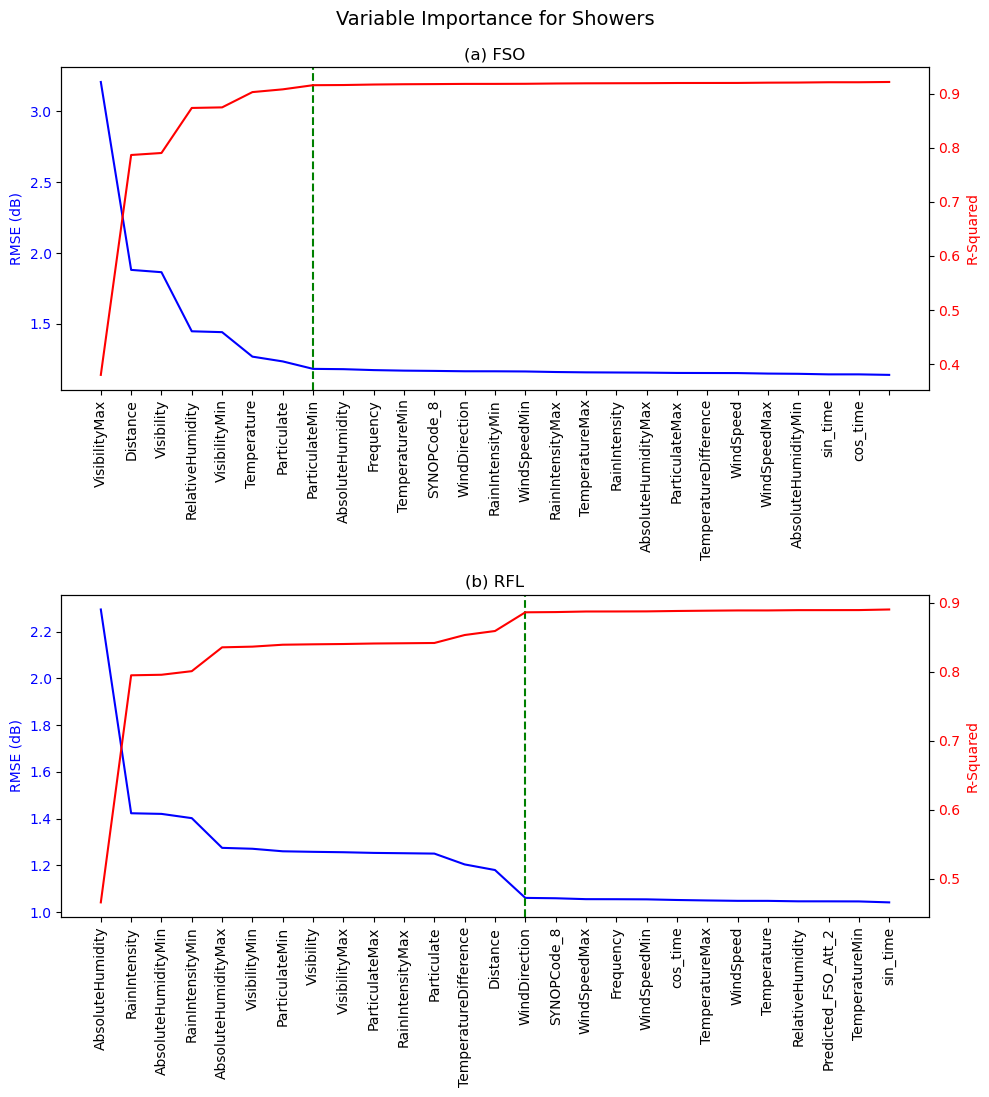

In [86]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 7  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO_2.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 14  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL_2.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Showers', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()


# Most common variable

In [84]:
# Correctly defining the data
variables_data = {
    'Independent_RFL': {
        'Generic': [
            'VisibilityMax', 'Frequency', 'AbsoluteHumidityMax', 'TemperatureMax', 'ParticulateMin',
            'VisibilityMin', 'RelativeHumidity', 'Visibility', 'SYNOPCode_0', 'ParticulateMax',
            'Temperature', 'Distance', 'RainIntensityMax', 'RainIntensityMin', 'AbsoluteHumidity', 'RainIntensity'
        ],
        '0': [
            'cos_time', 'Frequency', 'VisibilityMin', 'Visibility', 'Temperature', 'AbsoluteHumidityMin',
            'AbsoluteHumidityMax', 'AbsoluteHumidity', 'Distance'
        ],
        '3': [
            'Visibility', 'RelativeHumidity', 'AbsoluteHumidityMin', 'TemperatureMin', 'TemperatureDifference',
            'AbsoluteHumidityMax', 'TemperatureMax', 'AbsoluteHumidity', 'sin_time'
        ],
        '4': [
            'SYNOPCode_4', 'Visibility', 'AbsoluteHumidity', 'TemperatureMax', 'Temperature',
            'TemperatureMin', 'ParticulateMax', 'RainIntensityMax', 'RainIntensity', 'AbsoluteHumidityMin',
            'RainIntensityMin', 'RelativeHumidity'
        ],
        '5': [
            'TemperatureDifference', 'ParticulateMin', 'Frequency', 'VisibilityMin', 'RainIntensityMin',
            'RelativeHumidity', 'Distance', 'RainIntensityMax', 'RainIntensity', 'AbsoluteHumidityMin',
            'AbsoluteHumidityMax', 'AbsoluteHumidity'
        ],
        '6': [
            'WindDirection', 'cos_time', 'TemperatureDifference', 'VisibilityMin', 'RelativeHumidity',
            'VisibilityMax', 'ParticulateMax', 'AbsoluteHumidityMax', 'Distance', 'ParticulateMin',
            'Visibility', 'Temperature', 'AbsoluteHumidity', 'RainIntensityMax', 'RainIntensityMin',
            'RainIntensity'
        ],
        '7': [
            'Distance', 'RainIntensity', 'RelativeHumidity', 'TemperatureDifference', 'Particulate',
            'Visibility', 'sin_time', 'AbsoluteHumidityMax', 'RainIntensityMax', 'AbsoluteHumidity',
            'RainIntensityMin', 'cos_time'
        ],
        '8': [
            'SYNOPCode_8', 'Distance', 'RelativeHumidity', 'TemperatureDifference', 'VisibilityMin',
            'AbsoluteHumidityMin', 'Visibility', 'Particulate', 'ParticulateMin', 'RainIntensityMax',
            'VisibilityMax', 'ParticulateMax', 'RainIntensityMin', 'AbsoluteHumidityMax', 'RainIntensity',
            'AbsoluteHumidity'
        ]
    },
    'Independent_FSO': {
        'Generic': [
            'AbsoluteHumidityMax', 'WindSpeedMax', 'cos_time', 'TemperatureDifference', 'ParticulateMax',
            'RelativeHumidity', 'AbsoluteHumidity', 'TemperatureMax', 'ParticulateMin', 'Particulate',
            'VisibilityMin', 'TemperatureMin', 'VisibilityMax', 'Temperature', 'Visibility', 'Distance'
        ],
        '0': [
            'RainIntensityMax', 'ParticulateMin', 'cos_time', 'AbsoluteHumidityMax', 'WindSpeedMin',
            'RelativeHumidity', 'TemperatureDifference', 'Visibility', 'AbsoluteHumidity', 'TemperatureMin',
            'VisibilityMax', 'VisibilityMin', 'TemperatureMax', 'Temperature', 'Distance'
        ],
        '3': [
            'RainIntensityMin', 'RelativeHumidity', 'Visibility', 'Distance', 'VisibilityMin', 'VisibilityMax'
        ],
        '4': [
            'cos_time', 'Visibility', 'RelativeHumidity', 'Temperature', 'WindSpeedMax', 'sin_time',
            'Distance', 'TemperatureMax', 'TemperatureMin', 'ParticulateMax', 'Particulate', 'ParticulateMin'
        ],
        '5': [
            'sin_time', 'RelativeHumidity', 'TemperatureMin', 'Visibility', 'Particulate', 'TemperatureMax',
            'Temperature', 'ParticulateMin', 'VisibilityMin', 'VisibilityMax', 'ParticulateMax', 'Distance'
        ],
        '6': [
            'RainIntensity', 'TemperatureDifference', 'TemperatureMax', 'VisibilityMin', 'RelativeHumidity',
            'VisibilityMax', 'AbsoluteHumidity', 'ParticulateMin', 'Visibility', 'Temperature', 'Distance',
            'ParticulateMax', 'Particulate'
        ],
        '7': [
            'SYNOPCode_7', 'TemperatureMax', 'TemperatureDifference', 'Temperature', 'ParticulateMax',
            'cos_time', 'ParticulateMin', 'Particulate'
        ],
        '8': [
            'ParticulateMin', 'AbsoluteHumidity', 'Temperature', 'RelativeHumidity', 'Distance', 'VisibilityMax',
            'VisibilityMin', 'Visibility'
        ]
    },
    'Joint_RFL': {
        'Generic': [
            'Frequency', 'Visibility', 'TemperatureMax', 'Predicted_FSO_Att_2', 'ParticulateMax',
            'SYNOPCode_0', 'TemperatureMin', 'Temperature', 'RainIntensityMin', 'Distance',
            'RainIntensityMax', 'AbsoluteHumidity', 'RainIntensity'
        ],
        '0': [
            'WindSpeedMax', 'RelativeHumidity', 'Frequency', 'AbsoluteHumidityMin', 'VisibilityMin',
            'Visibility', 'TemperatureMin', 'Temperature', 'TemperatureMax', 'AbsoluteHumidityMax',
            'Predicted_FSO_Att_2', 'AbsoluteHumidity', 'Distance'
        ],
        '3': [
            'WindDirection', 'RainIntensityMin', 'WindSpeedMax', 'SYNOPCode_3', 'RainIntensity',
            'RelativeHumidity', 'sin_time', 'TemperatureDifference', 'Temperature', 'TemperatureMax',
            'AbsoluteHumidity', 'AbsoluteHumidityMax', 'TemperatureMin', 'AbsoluteHumidityMin'
        ],
        '4': [
            'VisibilityMax', 'TemperatureMin', 'RainIntensityMin', 'AbsoluteHumidityMin', 'RainIntensityMax',
            'RainIntensity', 'RelativeHumidity'
        ],
        '5': [
            'ParticulateMin', 'Frequency', 'Predicted_FSO_Att_2', 'RainIntensityMin', 'RelativeHumidity',
            'Distance', 'RainIntensityMax', 'RainIntensity', 'AbsoluteHumidityMin', 'AbsoluteHumidityMax',
            'AbsoluteHumidity'
        ],
        '6': [
            'Frequency', 'VisibilityMax', 'cos_time', 'Distance', 'VisibilityMin', 'AbsoluteHumidityMax',
            'RelativeHumidity', 'ParticulateMax', 'Visibility', 'ParticulateMin', 'Predicted_FSO_Att_2',
            'Temperature', 'AbsoluteHumidity', 'RainIntensityMax', 'RainIntensityMin', 'RainIntensity'
        ],
        '7': [
            'Predicted_FSO_Att_2', 'sin_time', 'AbsoluteHumidityMax', 'VisibilityMin', 'RelativeHumidity',
            'AbsoluteHumidity', 'RainIntensityMin', 'cos_time'
        ],
        '8': [
            'WindDirection', 'Distance', 'TemperatureDifference', 'Particulate', 'RainIntensityMax',
            'ParticulateMax', 'VisibilityMax', 'Visibility', 'ParticulateMin', 'VisibilityMin',
            'AbsoluteHumidityMax', 'RainIntensityMin', 'AbsoluteHumidityMin', 'RainIntensity', 'AbsoluteHumidity'
        ]
    },
    'Joint_FSO': {
        'Generic': [
            'cos_time', 'TemperatureDifference', 'RelativeHumidity', 'ParticulateMax', 'AbsoluteHumidity',
            'TemperatureMax', 'Predicted_RFL_Att_2', 'VisibilityMax', 'Particulate', 'TemperatureMin',
            'ParticulateMin', 'VisibilityMin', 'Temperature', 'Visibility', 'Distance'
        ],
        '0': [
            'RainIntensityMax', 'Particulate', 'AbsoluteHumidityMin', 'sin_time', 'RelativeHumidity',
            'WindSpeedMin', 'TemperatureDifference', 'VisibilityMax', 'AbsoluteHumidity', 'Visibility',
            'TemperatureMin', 'Predicted_RFL_Att_2', 'TemperatureMax', 'VisibilityMin', 'Temperature',
            'Distance'
        ],
        '3': [
            'Temperature', 'RelativeHumidity', 'VisibilityMin', 'Distance', 'VisibilityMax', 'Predicted_RFL_Att_2'
        ],
        '4': [
            'VisibilityMax', 'Visibility', 'Predicted_RFL_Att_2', 'TemperatureMin', 'WindSpeedMax',
            'sin_time', 'Distance', 'TemperatureMax', 'Temperature', 'ParticulateMin', 'ParticulateMax',
            'Particulate'
        ],
        '5': [
            'TemperatureDifference', 'sin_time', 'AbsoluteHumidity', 'RelativeHumidity', 'Predicted_RFL_Att_2',
            'VisibilityMin', 'TemperatureMin', 'Visibility', 'TemperatureMax', 'Particulate', 'ParticulateMin',
            'Temperature', 'VisibilityMax', 'ParticulateMax', 'Distance'
        ],
        '6': [
            'Frequency', 'VisibilityMax', 'cos_time', 'Distance', 'VisibilityMin', 'AbsoluteHumidityMax',
            'RelativeHumidity', 'ParticulateMax', 'Visibility', 'ParticulateMin', 'Predicted_FSO_Att_2',
            'Temperature', 'AbsoluteHumidity', 'RainIntensityMax', 'RainIntensityMin', 'RainIntensity'
        ],
        '7': [
            'Predicted_FSO_Att_2', 'sin_time', 'AbsoluteHumidityMax', 'VisibilityMin', 'RelativeHumidity',
            'AbsoluteHumidity', 'RainIntensityMin', 'cos_time'
        ],
        '8': [
            'ParticulateMin', 'Particulate', 'Temperature', 'VisibilityMin', 'RelativeHumidity', 'Visibility',
            'Distance'
        ]
    }
}

# Function to get most common variables
def get_most_common_variables(model_type, num_common=6):
    from collections import Counter
    variables = []
    for model in variables_data[model_type].values():
        variables.extend(model)
    variable_counts = Counter(variables)
    common_variables = variable_counts.most_common(num_common)
    return common_variables

# Get the most common variables for each model type
independent_rfl_common = get_most_common_variables('Independent_RFL')
independent_fso_common = get_most_common_variables('Independent_FSO')
joint_rfl_common = get_most_common_variables('Joint_RFL')
joint_fso_common = get_most_common_variables('Joint_FSO')

independent_rfl_common, independent_fso_common, joint_rfl_common, joint_fso_common
 


([('AbsoluteHumidity', 8),
  ('AbsoluteHumidityMax', 7),
  ('RelativeHumidity', 7),
  ('Visibility', 7),
  ('Distance', 6),
  ('RainIntensityMax', 6)],
 [('RelativeHumidity', 7),
  ('ParticulateMin', 7),
  ('Temperature', 7),
  ('Visibility', 7),
  ('Distance', 7),
  ('TemperatureMax', 6)],
 [('RainIntensityMin', 7),
  ('AbsoluteHumidity', 7),
  ('RainIntensity', 6),
  ('RelativeHumidity', 6),
  ('AbsoluteHumidityMax', 6),
  ('Predicted_FSO_Att_2', 5)],
 [('RelativeHumidity', 7),
  ('VisibilityMin', 7),
  ('Temperature', 7),
  ('Distance', 7),
  ('VisibilityMax', 6),
  ('Visibility', 6)])